<a href="https://colab.research.google.com/github/Bossitanmady/BGS-Technologies/blob/main/dissaade_model_ia_pour_la_detection_des_signes_vitaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importation de librairies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Chargement du fichier csv pour la détection d'anomalies des signes vitaux

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving donnees_couveuse_prematures.csv to donnees_couveuse_prematures.csv
User uploaded file "donnees_couveuse_prematures.csv" with length 1183461 bytes


# Stockage des données dans un objet pandas

In [5]:
df = pd.read_csv('donnees_couveuse_prematures.csv')
# affichage des cinq premiers élements du dataset
df.head()

,id_bebe,age_gestationnel_semaines,poids_naissance_g,heure,freq_cardiaque_bpm,freq_respiratoire_rpm,spo2_percent,temperature_c,pression_arterielle_mmhg,humidite_percent,poids_bebe_g,anomalie_detectee,type_anomalie
0,BEBE_001,28,1984,2025-01-01 00:00:00,138.3,50.7,88.9,36.5,53.0,51.5,1984,non,rien
1,BEBE_001,28,1984,2025-01-01 00:01:00,152.3,47.7,93.0,36.4,56.7,57.7,1984,non,rien
2,BEBE_001,28,1984,2025-01-01 00:02:00,129.9,54.4,93.8,36.3,52.7,46.1,1984,non,rien
3,BEBE_001,28,1984,2025-01-01 00:03:00,168.2,51.3,88.6,36.2,62.3,38.3,1984,non,rien
4,BEBE_001,28,1984,2025-01-01 00:04:00,180.7,58.2,94.7,36.6,53.0,47.8,1984,non,rien


In [6]:
# La statistiques descriptives du datasets
df.describe()

,age_gestationnel_semaines,poids_naissance_g,freq_cardiaque_bpm,freq_respiratoire_rpm,spo2_percent,temperature_c,pression_arterielle_mmhg,humidite_percent,poids_bebe_g
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000
mean,30.250000,1676.750000,149.975455,49.917187,91.941745,36.498979,60.069049,55.031792,1676.750000
std,2.547146,354.658318,15.405721,10.202078,3.081547,0.299699,10.097074,9.966940,354.658318
min,26.000000,1017.000000,69.928576,0.000000,71.440987,35.300000,14.600000,18.100000,1017.000000
25%,28.000000,1406.000000,139.775000,43.100000,90.000000,36.300000,53.375000,48.300000,1406.000000
50%,31.000000,1739.000000,149.900000,50.100000,92.000000,36.500000,60.200000,55.000000,1739.000000
75%,33.000000,1987.500000,160.100000,56.600000,94.000000,36.700000,66.800000,61.700000,1987.500000
max,34.000000,2192.000000,214.324237,88.000000,102.800000,37.700000,97.400000,94.700000,2192.000000


In [7]:
# Informations du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_bebe                    14400 non-null  object 
 1   age_gestationnel_semaines  14400 non-null  int64  
 2   poids_naissance_g          14400 non-null  int64  
 3   heure                      14400 non-null  object 
 4   freq_cardiaque_bpm         14400 non-null  float64
 5   freq_respiratoire_rpm      14400 non-null  float64
 6   spo2_percent               14400 non-null  float64
 7   temperature_c              14400 non-null  float64
 8   pression_arterielle_mmhg   14400 non-null  float64
 9   humidite_percent           14400 non-null  float64
 10  poids_bebe_g               14400 non-null  int64  
 11  anomalie_detectee          14400 non-null  object 
 12  type_anomalie              14400 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usag

In [8]:
# Description des colonnes du dataset

# Dictionnaire des descriptions
descriptions = {
    "id_bebe": "Identifiant unique du bébé",
    "age_gestationnel_semaines": "Âge gestationnel du bébé à la naissance, en semaines",
    "poids_naissance_g": "Poids à la naissance du bébé, en grammes",
    "heure": "Heure d’enregistrement des données",
    "freq_cardiaque_bpm": "Fréquence cardiaque du bébé, en battements par minute (BPM)",
    "freq_respiratoire_rpm": "Fréquence respiratoire du bébé, en respirations par minute (RPM)",
    "spo2_percent": "Saturation en oxygène du sang du bébé, en pourcentage",
    "temperature_c": "Température corporelle du bébé, en degrés Celsius",
    "pression_arterielle_mmhg": "Pression artérielle du bébé, en mmHg",
    "humidite_percent": "Taux d’humidité ambiante, en pourcentage",
    "poids_bebe_g": "Poids actuel du bébé, en grammes",
    "anomalie_detectee": "Indicateur binaire précisant si une anomalie a été détectée ('oui' ou 'non')",
    "type_anomalie": "Type spécifique d’anomalie détectée (ex : hypothermie, tachycardie, etc.)"
}

# Création du DataFrame
df_description = pd.DataFrame(list(descriptions.items()), columns=["colonne", "description"])

df_description.head(12)


,colonne,description
0,id_bebe,Identifiant unique du bébé
1,age_gestationnel_semaines,"Âge gestationnel du bébé à la naissance, en se..."
2,poids_naissance_g,"Poids à la naissance du bébé, en grammes"
3,heure,Heure d’enregistrement des données
4,freq_cardiaque_bpm,"Fréquence cardiaque du bébé, en battements par..."
5,freq_respiratoire_rpm,"Fréquence respiratoire du bébé, en respiration..."
6,spo2_percent,"Saturation en oxygène du sang du bébé, en pour..."
7,temperature_c,"Température corporelle du bébé, en degrés Celsius"
8,pression_arterielle_mmhg,"Pression artérielle du bébé, en mmHg"
9,humidite_percent,"Taux d’humidité ambiante, en pourcentage"


In [9]:
# Identification des variables categorielles du jeu de données
colonnes_categorielles = df.select_dtypes(include=['object']).columns
print("Variables catégorielles:")
print(colonnes_categorielles)

Variables catégorielles:
Index(['id_bebe', 'heure', 'anomalie_detectee', 'type_anomalie'], dtype='object')


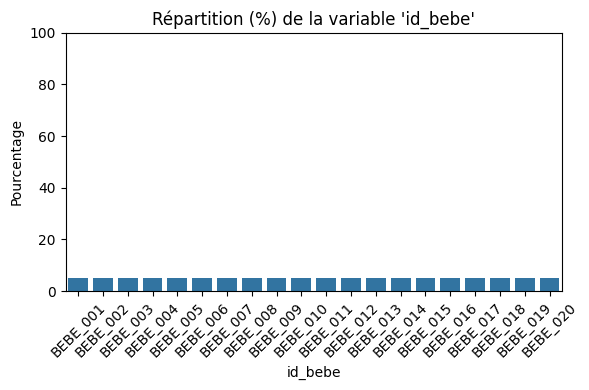

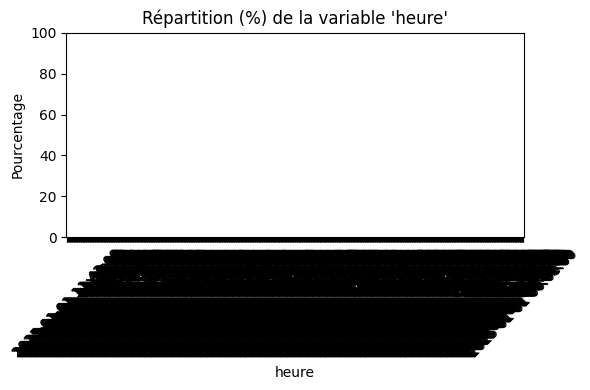

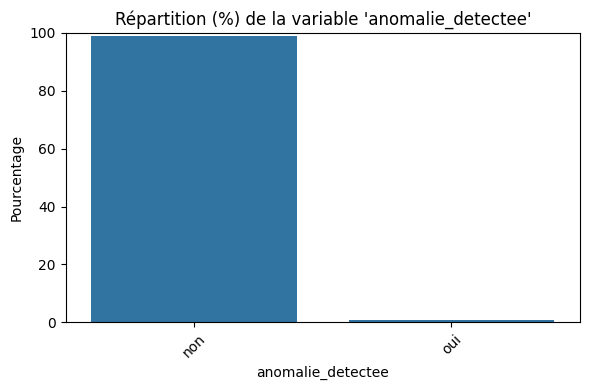

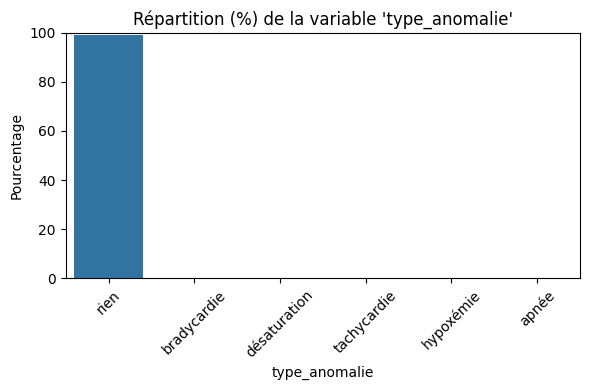

In [10]:
# Sélectionner les colonnes catégorielles
colonnes_categorielles = df.select_dtypes(include=['object', 'category']).columns

# Afficher un graphique pour chaque variable catégorielle
for col in colonnes_categorielles:
    valeurs = df[col].value_counts(normalize=True) * 100

    plt.figure(figsize=(6, 4))
    sns.barplot(x=valeurs.index, y=valeurs.values)
    plt.title(f"Répartition (%) de la variable '{col}'")
    plt.ylabel("Pourcentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


In [11]:
# verification combien de vraies anomalies
df['anomalie_detectee'].value_counts()

,count
anomalie_detectee,
non,14261
oui,139


In [12]:
# Selection des variables numerique utiles
colonnes_utiles = [
    'age_gestationnel_semaines', 'poids_naissance_g', 'freq_cardiaque_bpm',
    'freq_respiratoire_rpm', 'spo2_percent', 'temperature_c',
    'pression_arterielle_mmhg', 'humidite_percent', 'poids_bebe_g'
]

X = df[colonnes_utiles].copy()

In [13]:
# Detection des valeurs manquantes
X.isnull().sum()

,0
age_gestationnel_semaines,0
poids_naissance_g,0
freq_cardiaque_bpm,0
freq_respiratoire_rpm,0
spo2_percent,0
temperature_c,0
pression_arterielle_mmhg,0
humidite_percent,0
poids_bebe_g,0


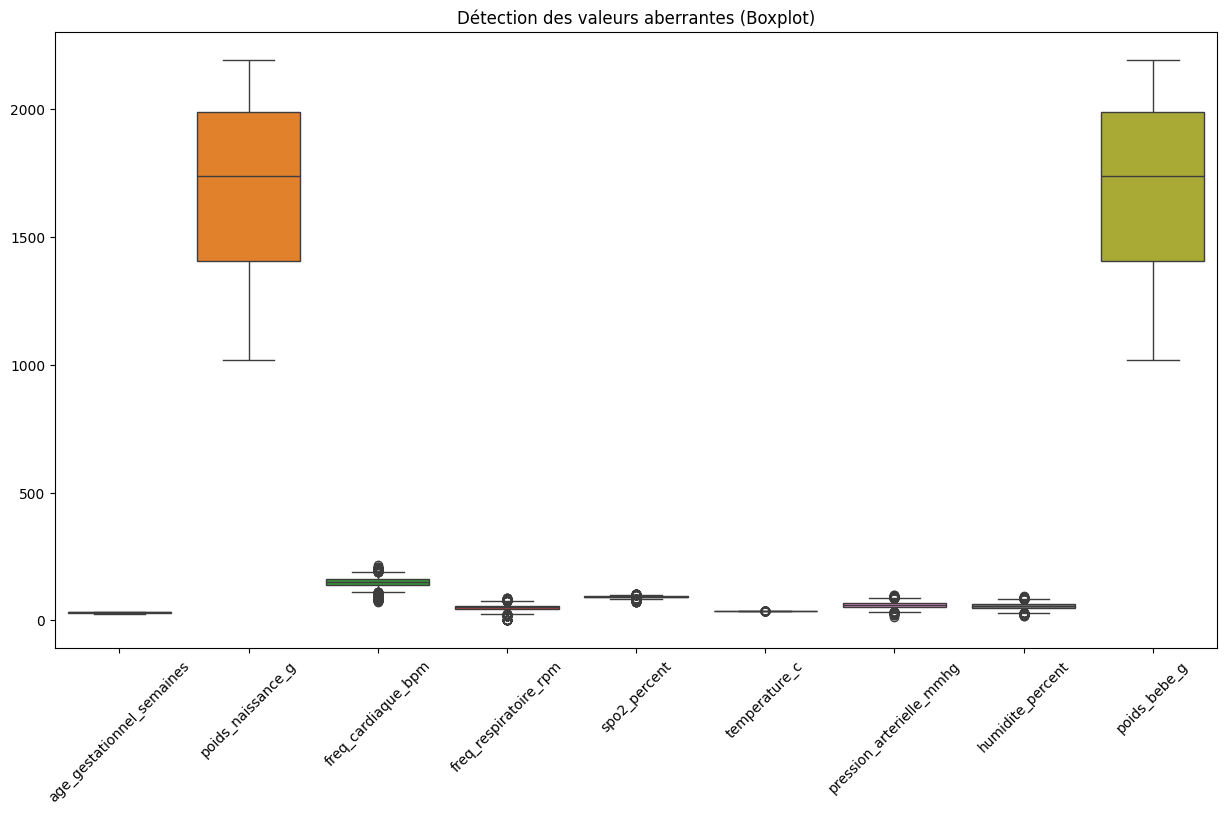

In [14]:
# Détection des valeurs abberantes ou extrêmes

# Boxplot de toutes les variables numériques

plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes (Boxplot)")
plt.show()

In [15]:
# Methode statistique: écart interquartile (IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Nombre d'outliers par colonne
print(outliers.sum())

age_gestationnel_semaines      0
poids_naissance_g              0
freq_cardiaque_bpm           155
freq_respiratoire_rpm        138
spo2_percent                 127
temperature_c                 56
pression_arterielle_mmhg     123
humidite_percent             101
poids_bebe_g                   0
dtype: int64


In [16]:
# Normalisation (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Extraction des cas normaux uniquement pour l'entrainement
# on ne garde que les lignes où il n'y a pas d'anomalie
df_normaux = df[df["anomalie_detectee"]=="non"]
X_train = df_normaux[colonnes_utiles].copy()
X_train_scaled = scaler.fit_transform(X_train)

# Etapes de visualistion des variables numériques
## Courbe de distribution pour chaque variable

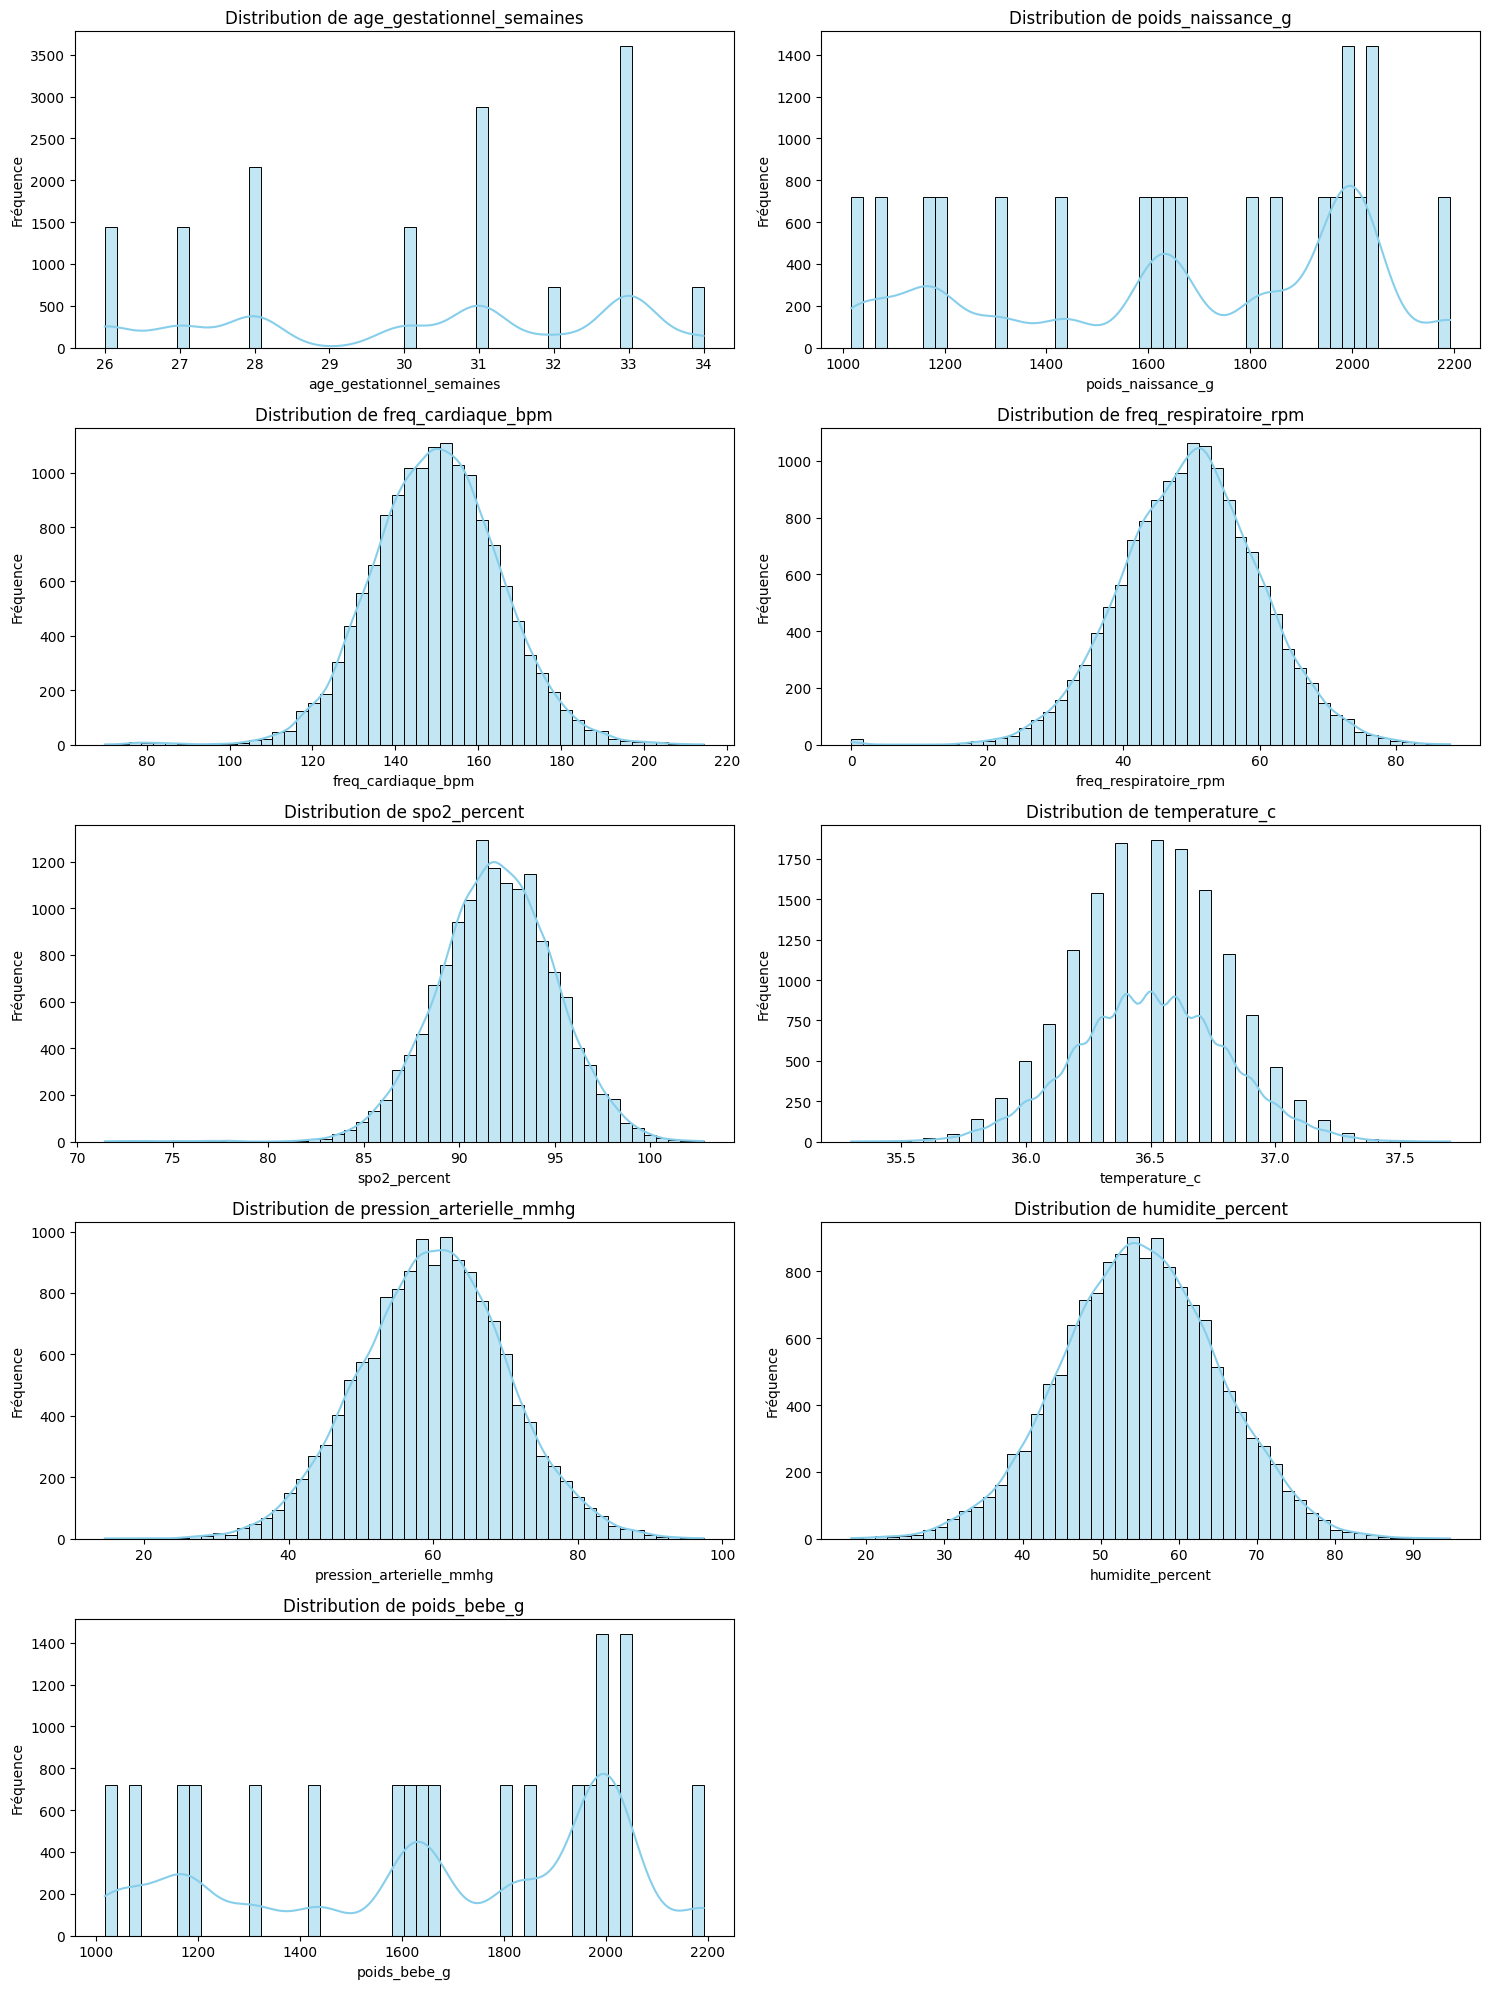

In [18]:
# Fixer la taille de l'ensemble des graphiques
plt.figure(figsize=(15, 20))

# Parcourir chaque variable numérique
for i, col in enumerate(X.select_dtypes(include='number').columns):
    plt.subplot(5, 2, i + 1)
    sns.histplot(X[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

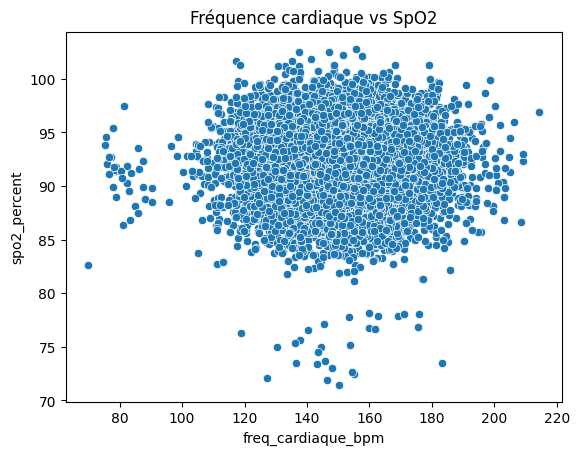

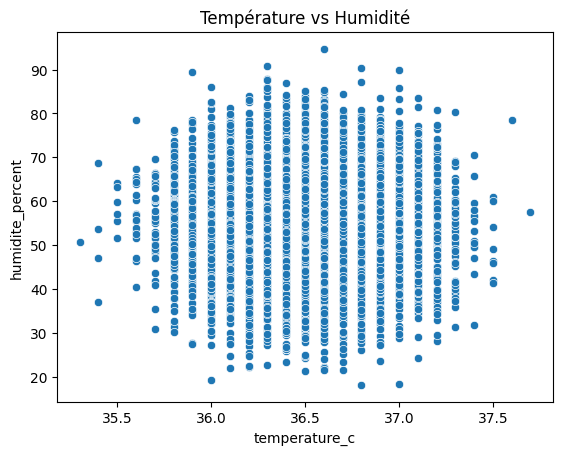

In [19]:
# nuages des points
# Fréquence cardiaque vs SpO2
sns.scatterplot(x='freq_cardiaque_bpm', y='spo2_percent', data=X)
plt.title("Fréquence cardiaque vs SpO2")
plt.show()

# Température vs Humidité
sns.scatterplot(x='temperature_c', y='humidite_percent', data=X)
plt.title("Température vs Humidité")
plt.show()


# Entrrainement du modèle TensorFlow
Entraîner un AutoEncoder pour apprendre les "valeurs normales" des capteurs vitaux des bébés. Ensuite, on détecte les anomalies en mesurant l’erreur de reconstruction (si l’erreur est élevée → anomalie probable).

# 1) Préparation des données

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1️⃣ Dimensions d'entrée
input_dim = X_train_scaled.shape[1]

#  2. Construction du modèle AutoEncoder (avec Keras / TensorFlow)

In [21]:
# 2️⃣ Définition du modèle
input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation="relu")(input_layer)
encoded = layers.Dense(32, activation="relu")(encoded)

decoded = layers.Dense(64, activation="relu")(encoded)
output_layer = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = keras.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,417 (21.16 KB)

 Trainable params: 5,417 (21.16 KB)

 Non-trainable params: 0 (0.00 B)

#  3. Entraînement du modèle

In [22]:
# Entraînement (pas besoin d'étiquettes)
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.1
)


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3940 - val_loss: 0.0101
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8512e-04 - val_loss: 8.1748e-04
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1654e-04 - val_loss: 4.3415e-04
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9187e-04 - val_loss: 3.3980e-04
Epoch 9/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9916e-04 - val_loss: 1.5746e-04
Epoch 10/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4057e-04 - val_loss: 2.1794e-04
Epoch 11/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0171e-04 - val_loss: 1.6366e-04
Epoc

# 4. Affichage de la courbe de perte

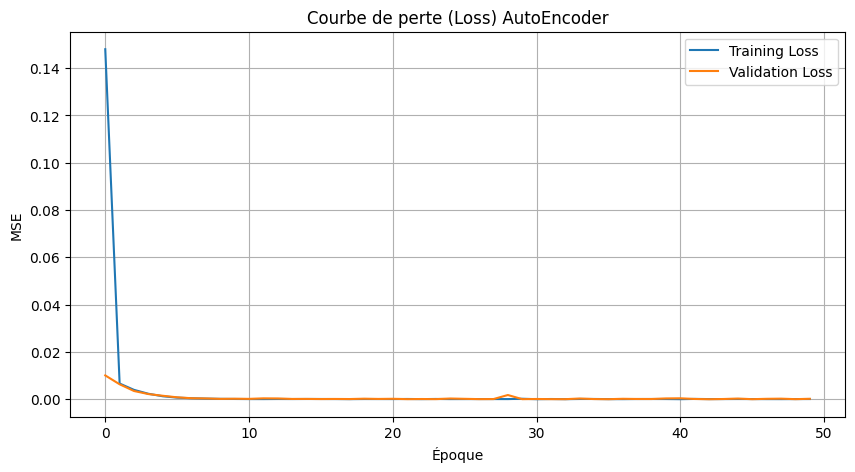

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Courbe de perte (Loss) AutoEncoder")
plt.xlabel("Époque")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

# 🔁 1. Amélioration de l'AutoEncoder (structure + seuil)
##✅ a. Structure plus robuste de l’AutoEncoder

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_train_scaled.shape[1]
encoding_dim = input_dim // 2  # peut être ajusté

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
encoded = Dense(encoding_dim // 2, activation="relu")(encoded)

decoded = Dense(encoding_dim, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107 (428.00 B)

 Trainable params: 107 (428.00 B)

 Non-trainable params: 0 (0.00 B)

# ✅ b. Réentraîner + nouvelle évaluation + seuil

In [25]:
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

# Nouveau seuil d’anomalie basé sur quantile 95
reconstruction_errors = np.mean((autoencoder.predict(X_train_scaled) - X_train_scaled)**2, axis=1)
threshold = np.percentile(reconstruction_errors, 95)
print("Seuil d’anomalie recalculé :", threshold)

Epoch 1/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.9835 - val_loss: 0.9163
Epoch 2/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7764 - val_loss: 0.8209
Epoch 3/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7026 - val_loss: 0.7822
Epoch 4/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6766 - val_loss: 0.7641
Epoch 5/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6548 - val_loss: 0.7543
Epoch 6/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6551 - val_loss: 0.7511
Epoch 7/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6604 - val_loss: 0.7512
Epoch 8/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6504 - val_loss: 0.7486
Epoch 9/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6497 - val_loss: 0.7439
Epoch 10/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6524 - val_loss: 0.7449
Epoch 11/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6518 - val_loss: 0.7430
Epoch 12/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

#2. Appliquer le modèle à tout le dataset + détecter les anomalies
### a. Préparation des données

In [26]:
# On prend tout le dataset, pas juste les normaux
X_all = df[colonnes_utiles].copy()
X_all_scaled = scaler.transform(X_all)

###  b. Prédiction avec l’autoencoder

In [27]:
# Reconstruction
X_pred_scaled = autoencoder.predict(X_all_scaled)


450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### c. Calcul de l’erreur de reconstruction (MSE)

In [28]:
# Erreur pour chaque ligne
reconstruction_errors = np.mean(np.square(X_all_scaled - X_pred_scaled), axis=1)

# Ajout dans le dataframe
df["reconstruction_error"] = reconstruction_errors


### d. Définir un seuil d’anomalie

In [29]:
threshold = np.percentile(
    df[df["anomalie_detectee"] == "non"]["reconstruction_error"], 95
)
print("Seuil d’anomalie :", threshold)


Seuil d’anomalie : 1.359288642539398


### e. Détection automatique

In [30]:
df["anomalie_predite"] = df["reconstruction_error"] > threshold
df["anomalie_predite"] = df["anomalie_predite"].astype(int)
df["anomalie_predite"].value_counts()

,count
anomalie_predite,
0,13579
1,821


#  3. 💾 Sauvegarde du modèle et la convertion en .tflite pour Edge Impulse
###  a. Sauvegarde du modèle au format .h5

In [40]:
# Supposons que tu as déjà un modèle entraîné nommé "autoencoder"
autoencoder.save("autoencoder_anomalie.h5")

### Réchargement du modèle sauvegarder

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model_path = "autoencoder_anomalie.h5"
autoencoder = load_model(model_path, compile=False)
autoencoder.compile(optimizer="adam", loss=MeanSquaredError())

### b. Conversion en .tflite (avec optimisations)



In [42]:
# ✅ 2. Créer un convertisseur TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)

# 💡 3. Optimisation recommandée pour l'inférence sur microcontrôleurs
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# ✅ 4. Conversion du modèle
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpt96nf0du'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  140520309439760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370827344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370830032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370828880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370828496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520309489744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520309489936: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [43]:
# Sauvegarder le modèle TFLite dans un fichier
with open("autoencoder_anomalie.tflite", "wb") as f:
    f.write(tflite_model)


# 4.  Visualisation des erreurs / anomalies
### a. Histogramme des erreurs de reconstruction

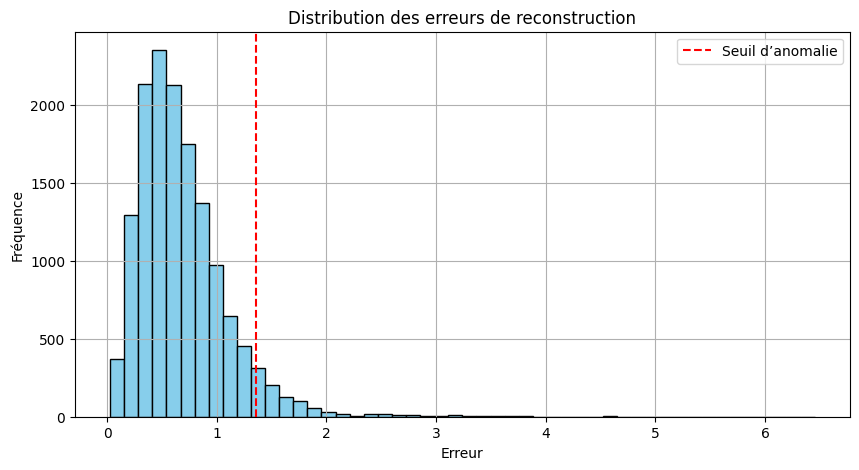

In [44]:
plt.figure(figsize=(10, 5))
plt.hist(df["reconstruction_error"], bins=50, color="skyblue", edgecolor="black")
plt.axvline(threshold, color="red", linestyle="--", label="Seuil d’anomalie")
plt.title("Distribution des erreurs de reconstruction")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

### b. Affichage des anomalies prédites


In [45]:
anomalies_detectees = df[df["anomalie_predite"] == True]
print("Nombre d’anomalies détectées :", len(anomalies_detectees))
anomalies_detectees.head()

Nombre d’anomalies détectées : 821


,id_bebe,age_gestationnel_semaines,poids_naissance_g,heure,freq_cardiaque_bpm,freq_respiratoire_rpm,spo2_percent,temperature_c,pression_arterielle_mmhg,humidite_percent,poids_bebe_g,anomalie_detectee,type_anomalie,reconstruction_error,anomalie_predite
13,BEBE_001,28,1984,2025-01-01 00:13:00,151.7,48.1,86.0,37.0,38.2,39.8,1984,non,rien,1.612138,1
34,BEBE_001,28,1984,2025-01-01 00:34:00,116.6,61.7,96.9,36.2,41.8,47.4,1984,non,rien,1.566363,1
53,BEBE_001,28,1984,2025-01-01 00:53:00,147.0,39.5,97.9,36.6,32.7,56.4,1984,non,rien,1.363493,1
54,BEBE_001,28,1984,2025-01-01 00:54:00,127.9,46.9,96.3,36.3,84.6,72.7,1984,non,rien,1.562059,1
66,BEBE_001,28,1984,2025-01-01 01:06:00,152.8,53.3,90.7,36.6,58.3,22.2,1984,non,rien,1.373344,1


# 💾 3. Téléchargement du  modèle dans le PC (local)

In [46]:
from google.colab import files

# Télécharger le modèle Keras
files.download("autoencoder_anomalie.h5")

# Télécharger le modèle TFLite
files.download("autoencoder_anomalie.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>